In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import direct_plugin
from kdelearn.metrics import pi_kf

from sklearn.neighbors import NearestNeighbors

Weźmy 1000 elementów z rozkładu DWUWYMIAROWEGO N(0,1) i m elementów z rozkładu N(0,25) (25 to wariancja, odchylenie 5). Znajdźmy podział optymalny w sensie naszego wskaźnika dla m po kolei 0, 10, 20, 50, 100, 200, 500, 1000.

Siatka dla k: (1, 2, 5, 10, 20, 50, 100, 200, 500)

Siatka dla r: (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2)

\newpage

m_noise=0
Wynik podstawowy przy r=0.05, k=10


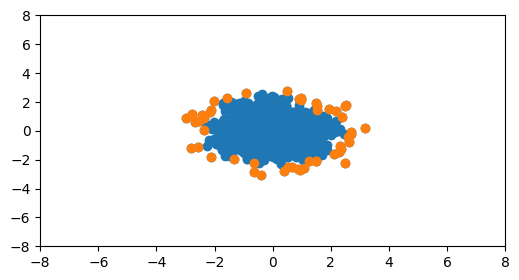

Wskaźnik jakości: 0.466279
Liczba nietypowych elementów: 50/1000 (5.000%)

Wynik po optymalizacji


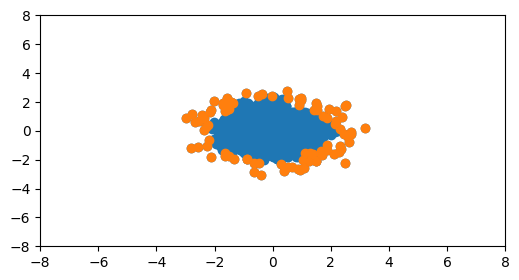

Najlepsze r: 0.09, k: 10
Wskaźnik jakości: 0.383556
Liczba nietypowych elementów: 90/1000 (9.000%)

m_noise=10
Wynik podstawowy przy r=0.05, k=10


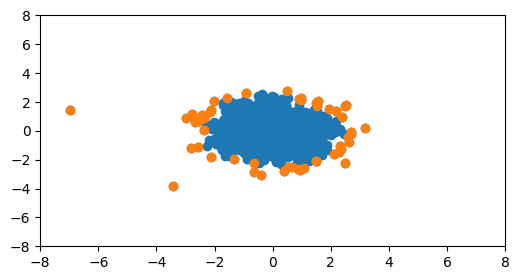

Wskaźnik jakości: 0.463985
Liczba nietypowych elementów: 51/1010 (5.050%)

Wynik po optymalizacji


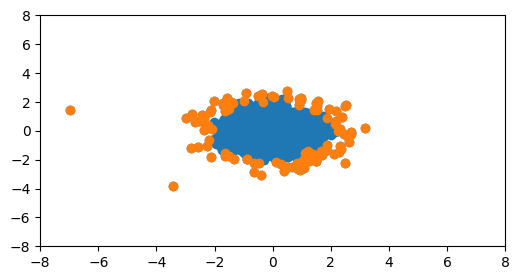

Najlepsze r: 0.10, k: 10
Wskaźnik jakości: 0.378644
Liczba nietypowych elementów: 101/1010 (10.000%)

m_noise=20
Wynik podstawowy przy r=0.05, k=10


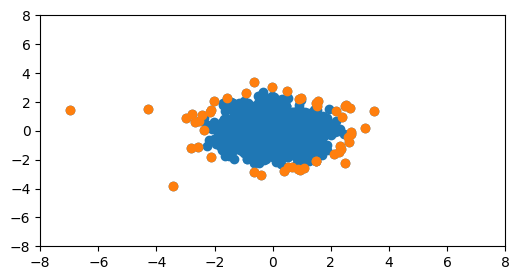

Wskaźnik jakości: 0.465688
Liczba nietypowych elementów: 51/1020 (5.000%)

Wynik po optymalizacji


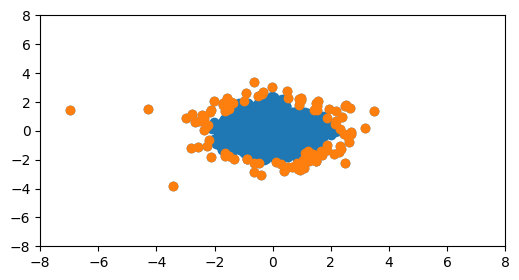

Najlepsze r: 0.10, k: 10
Wskaźnik jakości: 0.364847
Liczba nietypowych elementów: 102/1020 (10.000%)

m_noise=50
Wynik podstawowy przy r=0.05, k=10


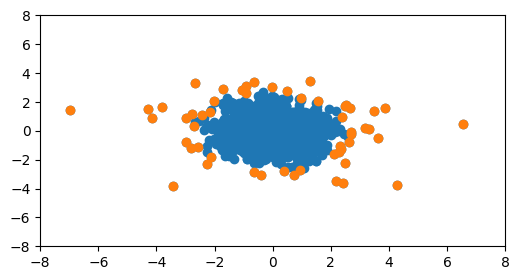

Wskaźnik jakości: 0.433647
Liczba nietypowych elementów: 53/1050 (5.048%)

Wynik po optymalizacji


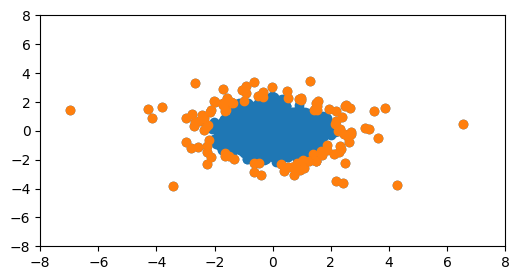

Najlepsze r: 0.11, k: 20
Wskaźnik jakości: 0.316913
Liczba nietypowych elementów: 116/1050 (11.048%)

m_noise=100
Wynik podstawowy przy r=0.05, k=10


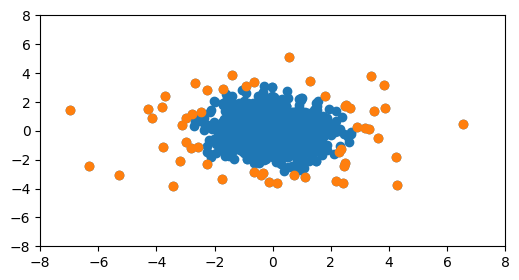

Wskaźnik jakości: 0.419924
Liczba nietypowych elementów: 55/1100 (5.000%)

Wynik po optymalizacji


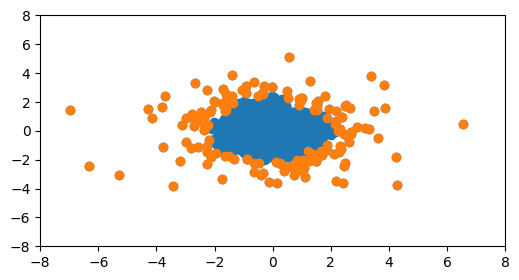

Najlepsze r: 0.14, k: 10
Wskaźnik jakości: 0.291871
Liczba nietypowych elementów: 154/1100 (14.000%)

m_noise=200
Wynik podstawowy przy r=0.05, k=10


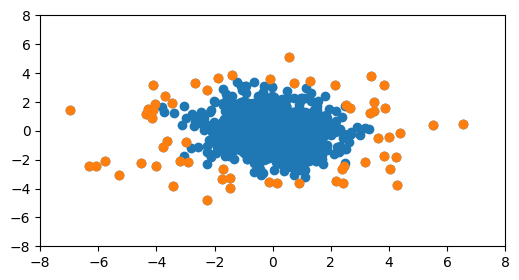

Wskaźnik jakości: 0.471645
Liczba nietypowych elementów: 60/1200 (5.000%)

Wynik po optymalizacji


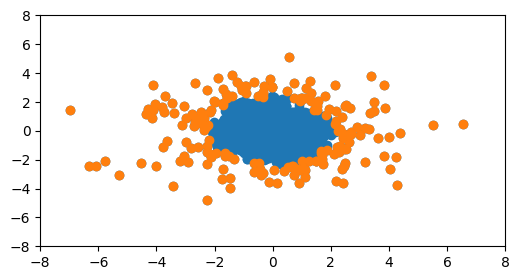

Najlepsze r: 0.16, k: 20
Wskaźnik jakości: 0.260828
Liczba nietypowych elementów: 192/1200 (16.000%)

m_noise=500
Wynik podstawowy przy r=0.05, k=10


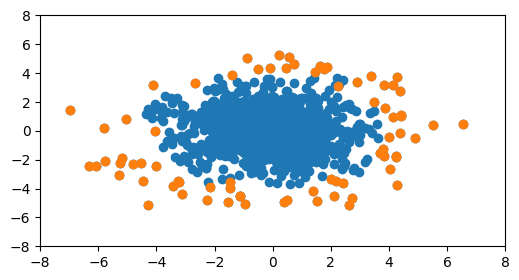

Wskaźnik jakości: 0.553251
Liczba nietypowych elementów: 75/1500 (5.000%)

Wynik po optymalizacji


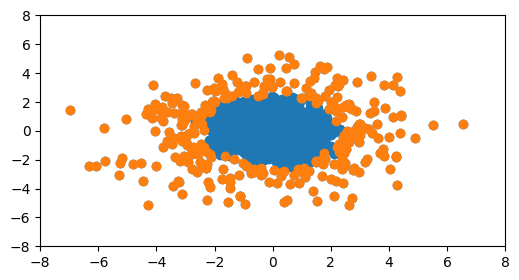

Najlepsze r: 0.20, k: 20
Wskaźnik jakości: 0.250680
Liczba nietypowych elementów: 300/1500 (20.000%)

m_noise=1000
Wynik podstawowy przy r=0.05, k=10


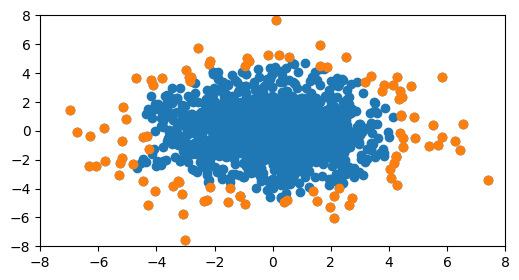

Wskaźnik jakości: 0.480751
Liczba nietypowych elementów: 100/2000 (5.000%)

Wynik po optymalizacji


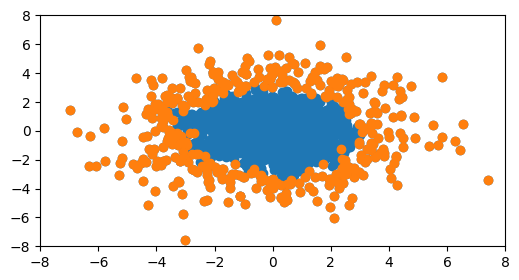

Najlepsze r: 0.20, k: 20
Wskaźnik jakości: 0.299350
Liczba nietypowych elementów: 400/2000 (20.000%)



In [2]:
# n = 2
m_train1 = 1000
    
k_grid = (1, 2, 5, 10, 20, 50, 100, 200, 500)
r_grid = (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,
          0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2)

for m_noise in [0, 10, 20, 50, 100, 200, 500, 1000]:
    np.random.seed(0)
    print(f"{m_noise=:}")
    print("Wynik podstawowy przy r=0.05, k=10")

    # Data
    x_train1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=(m_train1,))
    x_train2 = np.random.multivariate_normal([0, 0], [[5, 0], [0, 5]], size=(m_noise,))
    x_train = np.concatenate((x_train1, x_train2))
    m_train = x_train.shape[0]

    bandwidth = direct_plugin(x_train)

    # Outliers detection
    k = 10 # int(np.sqrt(m_train))
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    r = 0.05
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)
    metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.scatter(x_train[:, 0], x_train[:, 1])
    plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 1])
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.show()
    
    print(f"Wskaźnik jakości: {metric:.6f}")
    print(f"Liczba nietypowych elementów: {labels_pred.sum()}/{m_train1+m_noise} ({100 * labels_pred.sum()/(m_train1+m_noise):.3f}%)\n")
    
    # Dopasowanie parametrów na siatce
    print("Wynik po optymalizacji")
    
    best_metric = np.inf
    for k in k_grid:
        for r in r_grid:
            nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='brute').fit(x_train)
            distances, indices = nbrs.kneighbors(x_train)
            dist_k = np.max(distances, axis=1)
            threshold = np.quantile(dist_k, 1 - r)
            labels_pred = np.where(dist_k >= threshold, 1 ,0)
            metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)
            if metric < best_metric:
                best_k = k + 1
                best_r = r
                best_metric = metric

    # Outliers detection
    nbrs = NearestNeighbors(n_neighbors=best_k, algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - best_r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.scatter(x_train[:, 0], x_train[:, 1])
    plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 1])
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.show()

    print(f"Najlepsze r: {best_r:.2f}, k: {best_k-1}")
    print(f"Wskaźnik jakości: {best_metric:.6f}")
    print(f"Liczba nietypowych elementów: {labels_pred.sum()}/{m_train1+m_noise} ({100 * labels_pred.sum()/(m_train1+m_noise):.3f}%)\n")
    
#     print("-" * 30)